Uploading the data

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shanegerami","key":"0c32ffffd343776b8cd094b718ef52a5"}'}

In [2]:
!mkdir -p ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle/

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c nlp-getting-started

  0% 0.00/593k [00:00<?, ?B/s]
100% 593k/593k [00:00<00:00, 121MB/s]


In [6]:
!unzip nlp-getting-started.zip

Archive:  nlp-getting-started.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import feature_extraction, linear_model, model_selection, preprocessing

In [8]:
df = pd.read_csv("/content/train.csv")
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [9]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
#example of not a disaster
train[train["target"] == 0]["text"].values[1]

'I love fruits'

In [ ]:
#example of a disaster
train[train["target"] == 1]["text"].values[1]

'Forest fire near La Ronge Sask. Canada'

In [ ]:
train['keyword'].unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

In [ ]:
train['location'].unique()

array([nan, 'Birmingham', 'Est. September 2012 - Bristol', ...,
       'Vancouver, Canada', 'London ', 'Lincoln'], dtype=object)

Text Cleaning

In [10]:
import re
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')

# Load spaCy stopwords
nlp = spacy.load('en_core_web_sm')
spacy_stopwords = nlp.Defaults.stop_words

# Combine NLTK and spaCy stopwords
all_stopwords = set(stopwords.words('english')).union(spacy_stopwords)

custom_stopwords = set(['i', 'in', 'the', 'a', 'an', 'etc'])  # add any other custom stopwords
all_stopwords = all_stopwords.union(custom_stopwords)

def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove mentions and hashtags
    text = re.sub(r'\@\w+|\#','', text)

    # Remove punctuations and special characters
    text = re.sub(r'\W', ' ', text)

    text = text.lower()

    # Remove stop words using the enhanced list
    text_tokens = word_tokenize(text)
    filtered_words = [word for word in text_tokens if word not in all_stopwords]

    # Stemming
    ps = PorterStemmer()
    stemmed_words = [ps.stem(word) for word in filtered_words]

    # Convert to lowercase and join words to a single string
    return ' '.join(stemmed_words).lower()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [50]:
train['cleaned_text'] = train['text'].apply(clean_text)
test['cleaned_text'] = test['text'].apply(clean_text)

In [12]:
train.head()

,id,keyword,location,text,target,cleaned_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquak allah forgiv
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la rong sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resid ask shelter place notifi offic evacu she...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13 000 peopl receiv wildfir evacu order califo...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo rubi alaska smoke wildfir pour ...


Data Visualization

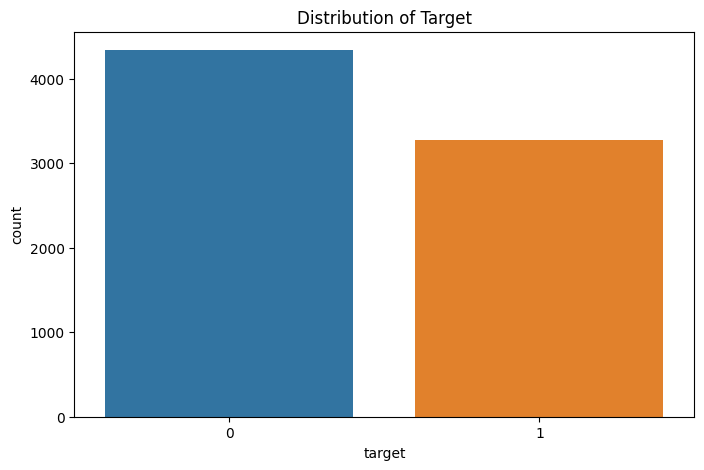

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Visualize the distribution of the 'target' column
plt.figure(figsize=(8, 5))
sns.countplot(data=train, x='target')
plt.title("Distribution of Target")
plt.show()

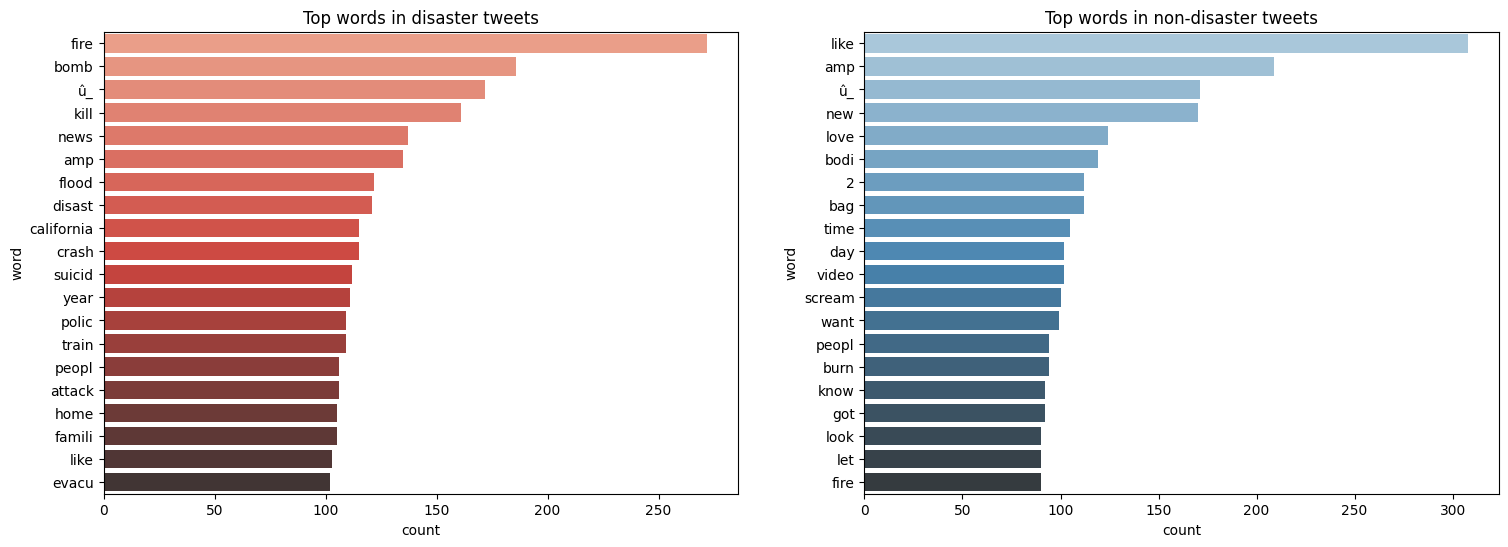

In [ ]:
def get_top_n_words(corpus, n=None):
    vec = [word for text in corpus for word in word_tokenize(text)]
    freqs = Counter(vec)
    return freqs.most_common(n)

# For disaster tweets
disaster_words = get_top_n_words(train[train['target'] == 1]['cleaned_text'], 20)

# For non-disaster tweets
non_disaster_words = get_top_n_words(train[train['target'] == 0]['cleaned_text'], 20)

# Plotting the top words
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Disaster words
df = pd.DataFrame(disaster_words, columns=['word', 'count'])
sns.barplot(data=df, x='count', y='word', ax=ax[0], palette="Reds_d")
ax[0].set_title("Top words in disaster tweets")

# Non-disaster words
df = pd.DataFrame(non_disaster_words, columns=['word', 'count'])
sns.barplot(data=df, x='count', y='word', ax=ax[1], palette="Blues_d")
ax[1].set_title("Top words in non-disaster tweets")

plt.show()

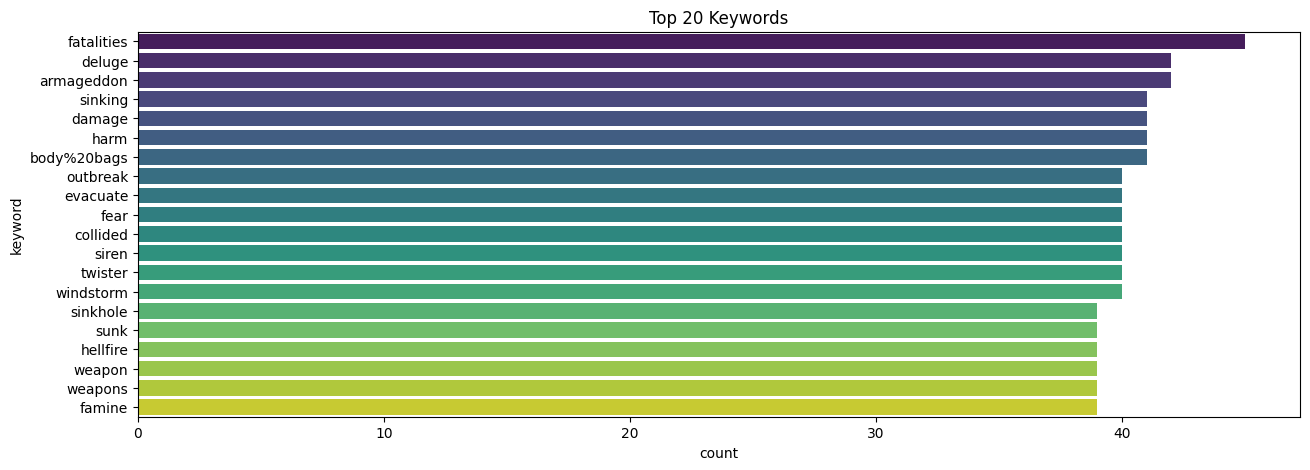

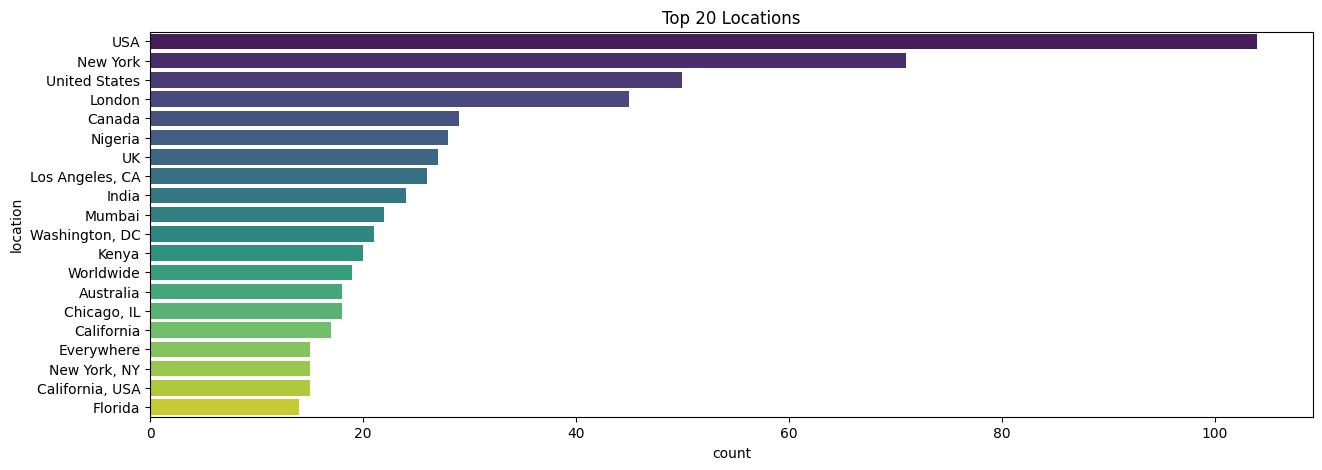

In [ ]:
# Exploring 'keyword' distribution
if 'keyword' in train.columns:
    plt.figure(figsize=(15, 5))
    sns.countplot(data=train, y='keyword', order=train['keyword'].value_counts().iloc[:20].index, palette='viridis')
    plt.title("Top 20 Keywords")
    plt.show()

# Exploring 'location' distribution
if 'location' in train.columns:
    plt.figure(figsize=(15, 5))
    sns.countplot(data=train, y='location', order=train['location'].value_counts().iloc[:20].index, palette='viridis')
    plt.title("Top 20 Locations")
    plt.show()

In [ ]:
#Bag of Words (BOW)

from sklearn.feature_extraction.text import CountVectorizer

# Initialize a CountVectorizer
bow_vectorizer = CountVectorizer(max_features=5000)  # Limiting to top 5000 frequent words

# Fit on the train set and transform
X_train_bow = bow_vectorizer.fit_transform(train['cleaned_text'])
X_test_bow = bow_vectorizer.transform(test['cleaned_text'])

In [ ]:
#Training and Evaluation

#Note: Since this is a Kaggle Comptetition the test set does not have a target column. So, we should use other evaluation methods to evaluate the model such as k-fold.
#We will try different classifiers, evaluate and fine-tune them to choose the best model with best hyperparameters

In [ ]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

# Set up Stratified K-Fold cross-validation
strat_kfold = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

# Hyperparameters for each classifier
param_grid = {
    'Logistic Regression': {
        'C': [0.001, 0.01, 0.1, 1, 10],
        'penalty': ['l1', 'l2']
    },
    'Support Vector Machine': {
        'C': [0.01, 0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Naive Bayes': {
        'alpha': [0.1, 0.5, 1]
    }
}

# Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Naive Bayes': MultinomialNB()
}

# For each model, run RandomizedSearchCV and print the best parameters
for model_name, model in models.items():
    print(f"Optimizing {model_name}...")

    # Use RandomizedSearchCV with 50 iterations (you can adjust n_iter as needed)
    randomized_search = RandomizedSearchCV(model, param_grid[model_name], n_iter=20,
                                           cv=strat_kfold, scoring='accuracy',
                                           n_jobs=-1, verbose=1, random_state=42)

    randomized_search.fit(X_train_bow, train['target'])

    print("Best Parameters for", model_name, ":", randomized_search.best_params_)
    print("Best Cross-validated Accuracy:", randomized_search.best_score_)
    print('-'*50)

Optimizing Logistic Regression...
Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 10 is smaller than n_iter=20. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.p

Best Parameters for Logistic Regression : {'penalty': 'l2', 'C': 1}
Best Cross-validated Accuracy: 0.7946943160841299
--------------------------------------------------
Optimizing Support Vector Machine...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters for Support Vector Machine : {'kernel': 'rbf', 'gamma': 'scale', 'C': 1}
Best Cross-validated Accuracy: 0.800080168898257
--------------------------------------------------
Optimizing Random Forest...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters for Random Forest : {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}
Best Cross-validated Accuracy: 0.7895721208954855
--------------------------------------------------
Optimizing Naive Bayes...
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best Parameters for Naive Bayes : {'alpha': 1}
Best Cross-validated Accuracy: 0.7967951905701579
------------------------------------------------

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=20. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [ ]:
#Accuracies of different models are about the same, so we will choose one of them as our model and move forward.

In [ ]:
#Model Selection

from sklearn.svm import SVC

model = SVC(kernel='rbf', gamma='scale', C=1, probability=True, random_state=42)

model.fit(X_train_bow, train['target'])

SVC(C=1, probability=True, random_state=42)

In [ ]:
#testing the model on an out of sample text

# Your arbitrary sentence
sentence = "100 people died from the flood"

# Preprocess the sentence using the same function you used for your dataset
cleaned_sentence = clean_text(sentence)

# Transform the cleaned sentence using CountVectorizer
sentence_vector = bow_vectorizer.transform([cleaned_sentence])

# Predict using the trained model
prediction = model.predict(sentence_vector)

if prediction == 1:
    print("The model predicts this as a disaster.")
else:
    print("The model predicts this as not a disaster.")

The model predicts this as a disaster.


In [ ]:
#You can try different sentences and see that the model is doing pretty well but let's see if we can get a higher accuracy.

In [ ]:
#Using other vectorizing methods:

In [ ]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4199772 sha256=1003887499037e1cc92ce42a7e15411d61ca03e2f4c0153887506e0a29d7dbec
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [ ]:
import fasttext.util

fasttext.util.download_model('en', if_exists='ignore')
ft = fasttext.load_model('cc.en.300.bin')

In [ ]:
def tweet_to_embedding(tweet, model):
    words = word_tokenize(tweet)
    embeddings = [model.get_word_vector(word) for word in words]
    return sum(embeddings) / len(embeddings) if words else np.zeros(300)  # 300 is the dimensionality of the embeddings you've chosen

X_train_ft = np.array([tweet_to_embedding(tweet, ft) for tweet in train['cleaned_text']])
X_test_ft = np.array([tweet_to_embedding(tweet, ft) for tweet in test['cleaned_text']])


In [ ]:
model.fit(X_train_ft, train['target'])

SVC(C=1, probability=True, random_state=42)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

strat_kfold = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

accuracies = []

for train_index, val_index in strat_kfold.split(X_train_ft, train['target']):
    # Split the data
    X_train_fold, X_val_fold = X_train_ft[train_index], X_train_ft[val_index]
    y_train_fold, y_val_fold = train['target'].iloc[train_index], train['target'].iloc[val_index]

    # Initialize and train the classifier
    svc = SVC(kernel='rbf', gamma='scale', C=1, probability=True, random_state=42)
    svc.fit(X_train_fold, y_train_fold)

    # Predict on the validation set
    predictions = svc.predict(X_val_fold)

    # Calculate accuracy
    accuracy = accuracy_score(y_val_fold, predictions)
    accuracies.append(accuracy)

# Print out the average accuracy
print("Average Accuracy:", np.mean(accuracies))


Average Accuracy: 0.7999488353351976


In [ ]:
#Using Word2Vec

In [42]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

sentences = [word_tokenize(tweet) for tweet in train['cleaned_text']]

model = Word2Vec(sentences, vector_size=200, window=5, min_count=1, workers=4)
model.train(sentences, total_examples=len(sentences), epochs=100)

def tweet_to_embedding(tweet, model):
    words = word_tokenize(tweet)
    words = [word for word in words if word in model.wv]
    if not words:
        return np.zeros(model.vector_size)
    embedding_matrix = np.array([model.wv[word] for word in words])
    return embedding_matrix.mean(axis=0)

X_train_w2v = np.array([tweet_to_embedding(tweet, model) for tweet in train['cleaned_text']])
X_test_w2v = np.array([tweet_to_embedding(tweet, model) for tweet in test['cleaned_text']])

In [44]:
model = SVC(kernel='rbf', gamma='scale', C=1, probability=True, random_state=42)
model.fit(X_train_w2v, train['target'])

SVC(C=1, probability=True, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

# Initialize Stratified K-Fold
strat_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store accuracies for each fold
accuracies = []

# Iterate through each fold
for train_index, val_index in strat_kfold.split(X_train_w2v, train['target']):
    # Split the data
    X_train_fold, X_val_fold = X_train_w2v[train_index], X_train_w2v[val_index]
    y_train_fold, y_val_fold = train['target'].iloc[train_index], train['target'].iloc[val_index]

    # Initialize and train the classifier
    svc = SVC(kernel='rbf', gamma='scale', C=1, probability=True, random_state=42)
    svc.fit(X_train_fold, y_train_fold)

    # Predict on the validation set
    predictions = svc.predict(X_val_fold)

    # Calculate accuracy
    accuracy = accuracy_score(y_val_fold, predictions)
    accuracies.append(accuracy)

# Print out the average accuracy
print("Average Accuracy:", np.mean(accuracies))

Average Accuracy: 0.8033641845620763


In [ ]:
#It seems like there is not much of difference between different methods so let's try other methods such as feauture engineering.
#Adding new columns:

In [14]:
#Sentiment Analysis

from textblob import TextBlob

train['sentiment'] = train['cleaned_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
test['sentiment'] = test['cleaned_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [15]:
#Text Statistics

train['word_count'] = train['cleaned_text'].apply(lambda x: len(x.split()))
train['avg_word_length'] = train['cleaned_text'].apply(lambda x: sum([len(word) for word in x.split()])/len(x.split()) if len(x.split()) > 0 else 0)

test['word_count'] = test['cleaned_text'].apply(lambda x: len(x.split()))
test['avg_word_length'] = test['cleaned_text'].apply(lambda x: sum([len(word) for word in x.split()])/len(x.split()) if len(x.split()) > 0 else 0)

In [60]:
#part of speech tagging

from nltk.tag import pos_tag
import nltk

nltk.download('averaged_perceptron_tagger')
def tag_text(text):
    tagged_text = pos_tag(word_tokenize(text))
    tag_freq = nltk.FreqDist(tag for (word, tag) in tagged_text)
    return tag_freq

train['tags'] = train['cleaned_text'].apply(tag_text)
test['tags'] = test['cleaned_text'].apply(tag_text)

# Example to extract noun count
train['noun_count'] = train['tags'].apply(lambda x: x['NN'] if 'NN' in x else 0)
test['noun_count'] = test['tags'].apply(lambda x: x['NN'] if 'NN' in x else 0)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
train.head()

,id,keyword,location,text,target,cleaned_text,sentiment,word_count,avg_word_length,tags,noun_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquak allah forgiv,0.0,5,6.000000,{'NN': 5},5
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la rong sask canada,0.1,7,4.285714,"{'JJS': 1, 'NN': 4, 'IN': 1, 'JJ': 1}",4
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resid ask shelter place notifi offic evacu she...,0.0,11,5.363636,"{'NN': 9, 'JJ': 1, 'VBP': 1}",9
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13 000 peopl receiv wildfir evacu order califo...,0.0,8,5.375000,"{'CD': 2, 'NN': 6}",6
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo rubi alaska smoke wildfir pour ...,0.0,9,4.888889,"{'VBD': 2, 'JJ': 3, 'NN': 4}",4


In [ ]:
train.groupby('target').mean()

<ipython-input-23-b82ff1a0b5a2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train.groupby('target').mean()


,id,sentiment,word_count,avg_word_length,noun_count
target,,,,,
0,5276.446338,0.049906,7.944496,5.049014,5.005758
1,5661.608071,0.010819,9.385203,5.291141,6.003057


In [ ]:
#Feature selection

#Training a new model based on the new features

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from scipy.sparse import hstack
import numpy as np

# Assuming you have separate DataFrames 'train' and 'test' with the same features
X_text = train['cleaned_text']
X_features = train[['word_count']]
y = train['target']

# Initialize and fit a CountVectorizer on the cleaned text
vectorizer = CountVectorizer(max_features=5000)
X_text_bow = vectorizer.fit_transform(X_text)

# Combine the text features and engineered features
X_train = hstack([X_text_bow, X_features])

# Initialize the MultinomialNB model
model = MultinomialNB()

# Define hyperparameters and their possible values for grid search
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],  # Laplace smoothing parameter
    'fit_prior': [True, False],  # Whether to learn class priors or not
}

# Initialize StratifiedKFold for cross-validation
stratified_kfold = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=stratified_kfold, scoring='accuracy', n_jobs=-1, verbose=1)

# Convert sparse matrices to arrays
X_train = X_train.toarray()

# Perform grid search and hyperparameter tuning
grid_search.fit(X_train, y)

# Print the best hyperparameters
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Perform cross-validation to evaluate the best model
accuracies = []

for train_index, test_index in stratified_kfold.split(X_train, y):
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    best_model.fit(X_train_fold, y_train_fold)

    y_pred = best_model.predict(X_test_fold)
    accuracy = accuracy_score(y_test_fold, y_pred)
    accuracies.append(accuracy)

# Print out the average accuracy
average_accuracy = np.mean(accuracies)
print("Average Accuracy:", average_accuracy)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters: {'alpha': 1.0, 'fit_prior': True}
Average Accuracy: 0.7981087677523687


In [ ]:
# you can try using different features but it seems like still the model cant do any better